In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# plt.rc(usetex = True)
def poly_plot2(x_data,y_data,x0,x1,ax,c='b',deg=1):
    try:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    except:
        res=np.polyfit(x_data,y_data,deg=deg,cov=True)
    coeff=res[0]
    k_err=[]
    i2=0;
    for i in res[1]:
        k_err.append(np.sqrt(i[i2]))
        i2+=1
    

    
    y=[]
    x_arr=np.linspace(x0,x1,1000)
    n=len(coeff)-1
    for x in x_arr:
        y_buff=0;
        n_buff=n;
        for i in coeff:
            y_buff+=i*x**n_buff
            n_buff-=1
        y.append(y_buff)
    s='y='
    n=deg
    for k in coeff:
        s+='('+format(k,'.2e')+')'+f'$x^{n}$+'
        n-=1
        
    ax.plot(x_arr,y,c=c,label=s[:-1])
    return coeff,k_err


In [11]:
data=pd.read_csv("table1.csv")
data.index=data.N
# data.I=data.I*1e-3
data.rename(columns={" U":"U"},inplace=True)
data.head()


,N,U,I
N,,,
1,1,2500,0.026
2,2,2650,0.043
3,3,2800,0.068
4,4,2950,0.090
5,5,3100,0.118


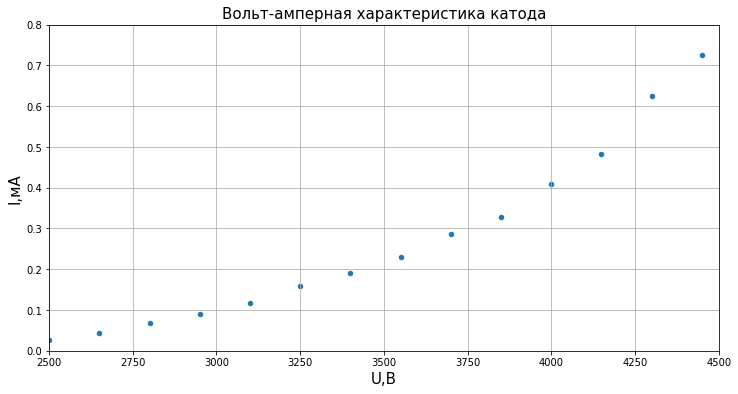

In [38]:
fig,ax= plt.subplots(figsize=(12,6))
data.plot(ax=ax,kind='scatter',x="U",y="I",s=20)
plt.ylim(0,0.8)
plt.xlim(2500,4500)
plt.title("Вольт-амперная характеристика катода",size=15)
plt.xlabel("U,В",size=15)
plt.ylabel("I,мА",size=15)

plt.grid()
fig.savefig("graph1.pdf")

In [13]:
data["ln"]=np.log(data.I*1e-3/data.U**2)
data["1/U"]=1/data.U
data.head()

,N,U,I,ln,1/U
N,,,,,
1,1,2500,0.026,-26.205506,0.000400
2,2,2650,0.043,-25.818940,0.000377
3,3,2800,0.068,-25.470752,0.000357
4,4,2950,0.090,-25.294822,0.000339
5,5,3100,0.118,-25.123141,0.000323


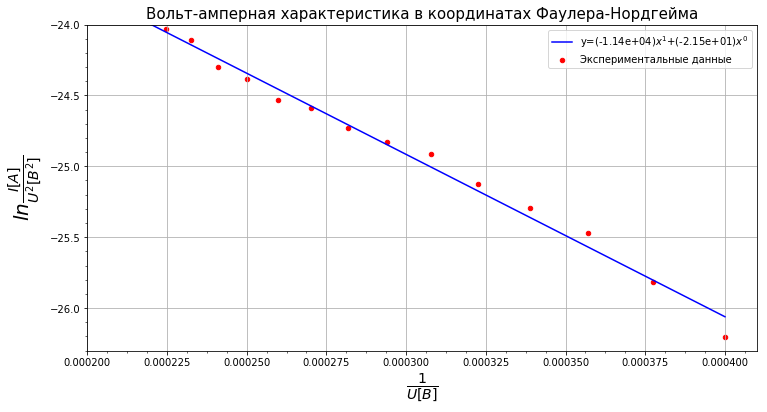

In [39]:
fig,ax= plt.subplots(figsize=(12,6))
data.plot(ax=ax,kind="scatter",x="1/U",y="ln",label="Экспериментальные данные",c='r')
plt.xlim(0.00020,0.00041)
plt.ylim(-26.3,-24)
coeff=poly_plot2(x_data=data["1/U"],y_data=data["ln"],x0=0.00020,x1=0.00040,ax=ax)
ax.minorticks_on()
plt.grid()
plt.title("Вольт-амперная характеристика в координатах Фаулера-Нордгейма",size=15)
plt.xlabel(r"$\frac{1}{U[В]}$",size=20)
plt.ylabel(r"$ln\frac{I[А]}{U^2[В^2]}$",size=20)
plt.legend()
fig.savefig("graph2.pdf")

In [42]:
k=coeff[0][0]
phi=4.5
beta=-0.683*phi**(3/2)/k
print(beta)

0.0005694525149072126
